# Face Identification:
###  Facial recognition using the Convonutional Neural Networks Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import cv2
import keras
import pickle

Using TensorFlow backend.


In [3]:
from keras.utils import np_utils

In [4]:
DATADIR="C:/Users/MOHIT CHVK/Desktop/new trash/face recog"
CATEGORIES=["dad","mohit","mom"]

In [5]:
IMG_SIZE=72

In [6]:
for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        print(path)

C:/Users/MOHIT CHVK/Desktop/new trash/face recog\dad
C:/Users/MOHIT CHVK/Desktop/new trash/face recog\mohit
C:/Users/MOHIT CHVK/Desktop/new trash/face recog\mom


In [10]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [11]:
print(len(training_data))

281


In [9]:
import random
random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [13]:
X=[]
y=[]

In [14]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [15]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [16]:
X.shape

(281, 72, 72, 1)

In [17]:
len(y)

281

In [18]:
#y=np_utils.to_categorical(y)

In [19]:
len(y)

281

In [20]:
y[0]

0

In [21]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

In [22]:
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [24]:
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

In [25]:
X=X/255.0

In [26]:
X[1]

array([[[0.04705882],
        [0.05882353],
        [0.03529412],
        ...,
        [0.27058824],
        [0.61176471],
        [0.69803922]],

       [[0.07058824],
        [0.05882353],
        [0.03921569],
        ...,
        [0.26666667],
        [0.43137255],
        [0.58431373]],

       [[0.14117647],
        [0.1372549 ],
        [0.0627451 ],
        ...,
        [0.27058824],
        [0.34117647],
        [0.68627451]],

       ...,

       [[0.05882353],
        [0.04705882],
        [0.05882353],
        ...,
        [0.35686275],
        [0.40784314],
        [0.2745098 ]],

       [[0.08235294],
        [0.03529412],
        [0.03137255],
        ...,
        [0.20392157],
        [0.14117647],
        [0.12941176]],

       [[0.14117647],
        [0.11372549],
        [0.07843137],
        ...,
        [0.14117647],
        [0.12941176],
        [0.10980392]]])

In [27]:
X.shape

(281, 72, 72, 1)

In [28]:
y[0]

0

In [29]:
model=Sequential()

In [30]:
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))    

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2))) 
          
model.add(Flatten())

model.add(Dense(64))

model.add(Dense(3)) 
model.add(Activation("softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [32]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [33]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


In [34]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [35]:

model.fit(X,y,batch_size=32,epochs=4,validation_split=0.1)

Train on 252 samples, validate on 29 samples
Epoch 1/4
252/252 [==============================] - 14s 57ms/sample - loss: 0.8600 - acc: 0.6310 - val_loss: 0.2540 - val_acc: 1.0000
Epoch 2/4
252/252 [==============================] - 0s 931us/sample - loss: 0.2873 - acc: 0.8770 - val_loss: 0.0900 - val_acc: 1.0000
Epoch 3/4
252/252 [==============================] - 0s 966us/sample - loss: 0.0575 - acc: 0.9960 - val_loss: 0.0296 - val_acc: 1.0000
Epoch 4/4
252/252 [==============================] - 0s 1ms/sample - loss: 0.0122 - acc: 1.0000 - val_loss: 0.0223 - val_acc: 1.0000


In [46]:
model.save("C:/Users/MOHIT CHVK/Desktop/new trash/face recog/frd.h5")

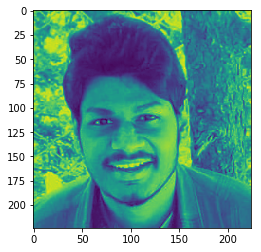

In [47]:
def image(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(224,224))
    return new_array
plt.imshow(image('C:/Users/MOHIT CHVK/Desktop/new trash/face recog/mohit-t/f1.jpg'))

In [41]:
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [44]:
prediction=model.predict([prepare('C:/Users/MOHIT CHVK/Desktop/new trash/face recog/mohit-t/f3.jpg')])
prediction

array([[1., 0., 0.]], dtype=float32)

In [45]:
np.argmax(prediction)

0